In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',  None)
from fbprophet import Prophet
%matplotlib inline

In [2]:
data =pd.read_csv('AMZNtrain.csv')

In [3]:
print(data.shape)
data.head()

(1258, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


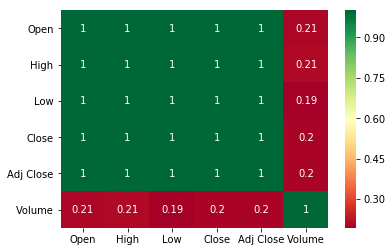

In [14]:
import seaborn as sns
sns.heatmap(data.corr(), annot =True, cmap='RdYlGn') #red yellow green

In [14]:
sample_df = data[['Date', 'Low']]
pro_df =sample_df.rename(columns={ 'Date':'ds', 'Low':'y'})
pro_df.head()

,ds,y
0,2014-01-02,394.019989
1,2014-01-03,396.220001
2,2014-01-06,388.420013
3,2014-01-07,394.290009
4,2014-01-08,396.040009


In [15]:
m= Prophet()
m.fit(pro_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
future = m.make_future_dataframe(periods= 730)
forcast= m.predict(future)

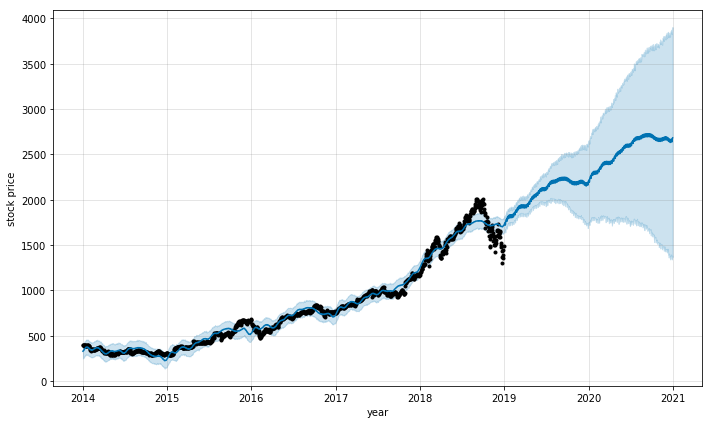

In [19]:
figure =m.plot(forcast, xlabel= 'year' , ylabel ='stock price')

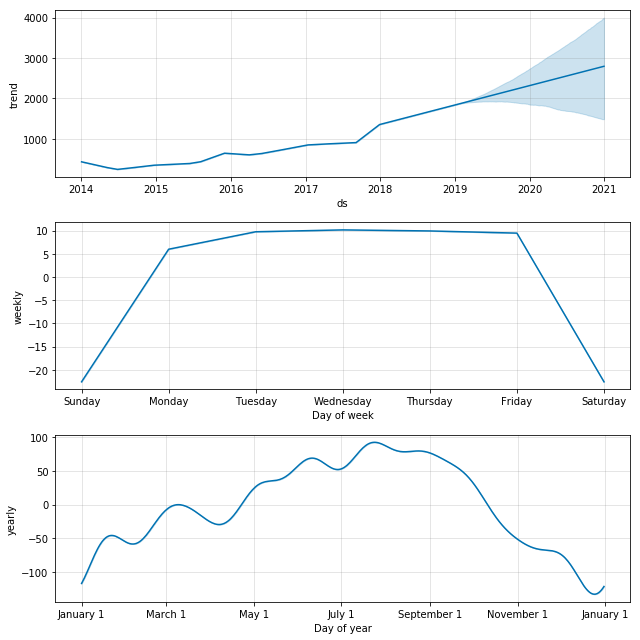

In [21]:
figure= m.plot_components(forcast)